<a href="https://colab.research.google.com/github/ananya1653/Text2Image/blob/main/text2image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install --quiet --upgrade diffusers transformers accelerate invisible_watermark mediapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.4 MB/s eta 0:00:00


In [ ]:
!apt-get update && apt-get install -y nvidia-driver-470

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,110 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,482 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,425 kB]
Get:13 http://archive.ubuntu.com/ubuntu 

In [ ]:
!apt-get install -y nvidia-cuda-toolkit
!nvcc --version # Remove the extra space at the beginning of this line
!reboot

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libaccinj64-11.5 libatk-wrapper-java libatk-wrapper-java-jni
  libbabeltrace1 libcub-dev libcublas11 libcublaslt11 libcudart11.0 libcufft10 libcufftw10
  libcuinj64-11.5 libcupti-dev libcupti-doc libcupti11.5 libcurand10 libcusolver11 libcusolvermg11
  libcusparse11 libdebuginfod-common libdebuginfod1 libegl-dev libfontenc1 libgail-common libgail18
  libgl-dev libgl1-mesa-dev libgles-dev libgles1 libglvnd-core-dev libglvnd-dev libglx-dev
  libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libipt2 libnppc11 libnppial11 libnppicc11 libnppidei11
  libnppif11 libnppig11 libnppim11 libnppist11 libnppisu11 libnppitc11 libnpps11 libnvblas11
  libnvidia-compute-495 libnvidia-compute-510 libnvidia-compute-535 libnvidia-ml-dev libnvjpeg11
  libnvrtc-builtins11.5 libnvrtc11.2 libnvtoolsext1 libnvvm4 libopengl-dev libr

In [ ]:
import torch
print(torch.cuda.is_available())  # Should print True if CUDA is working
print(torch.cuda.device_count())  # Should print the number of available GPUs

False
0


/usr/local/lib/python3.10/dist-packages/torch/cuda/__init__.py:716: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
use_refiner = False

In [ ]:
!pip install mediapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.1 MB/s eta 0:00:00


In [ ]:
!nvidia-smi  # Check if your GPU is recognized
!nvcc --version # Check if CUDA is installed and display the version
import mediapy as media
import random
import sys
import torch

from diffusers import DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
    )

if use_refiner:
  refiner = DiffusionPipeline.from_pretrained(
      "stabilityai/stable-diffusion-xl-refiner-1.0",
      text_encoder_2=pipe.text_encoder_2,
      vae=pipe.vae,
      torch_dtype=torch.float16,
      use_safetensors=True,
      variant="fp16",
  )

  refiner = refiner.to("cuda")

  pipe.enable_model_cpu_offload()
else:
  pipe = pipe.to("cuda")

Sun Nov 17 17:27:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

flowers of different colours


  0%|          | 0/50 [00:00<?, ?it/s]

Prompt:	flowers of different colours
Seed:	1678100590809413384


""

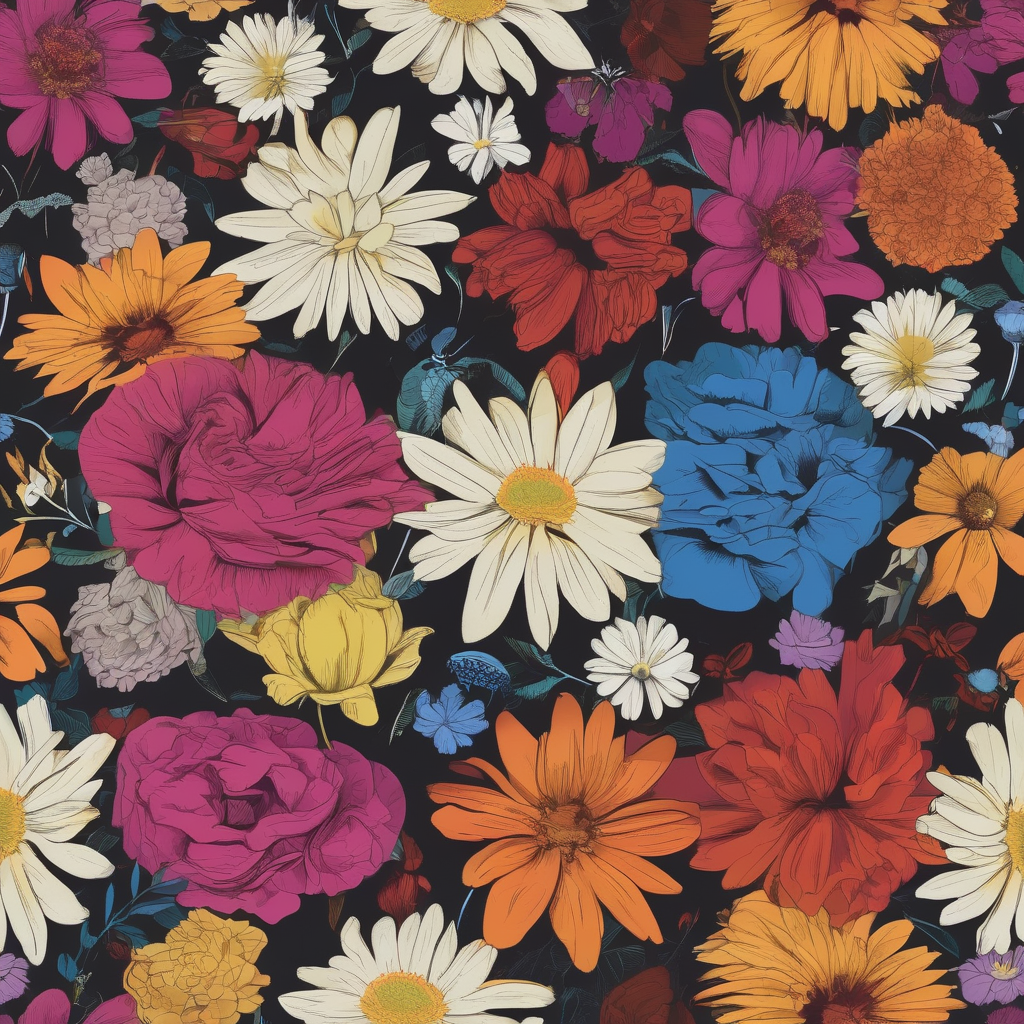

In [ ]:
prompt=input()
seed = random.randint(0, sys.maxsize)

images = pipe(
    prompt = prompt,
    output_type = "latent" if use_refiner else "pil",
    generator = torch.Generator("cuda").manual_seed(seed),
    ).images

if use_refiner:
  images = refiner(
      prompt = prompt,
      image = images,
      ).images

print(f"Prompt:\t{prompt}\nSeed:\t{seed}")
media.show_images(images)
images[0].save("output.jpg")